# Support Vector Machines Project 

Welcome to your Support Vector Machine Project! Just follow along with the notebook and instructions below. We will be analyzing the famous iris data set!

## The Data
For this series of lectures, we will be using the famous [Iris flower data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). 

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

Here's a picture of the three different Iris types:

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from PIL import Image
from io import BytesIO
%matplotlib inline

### Setosa, Versicolor, and Virginica Irises

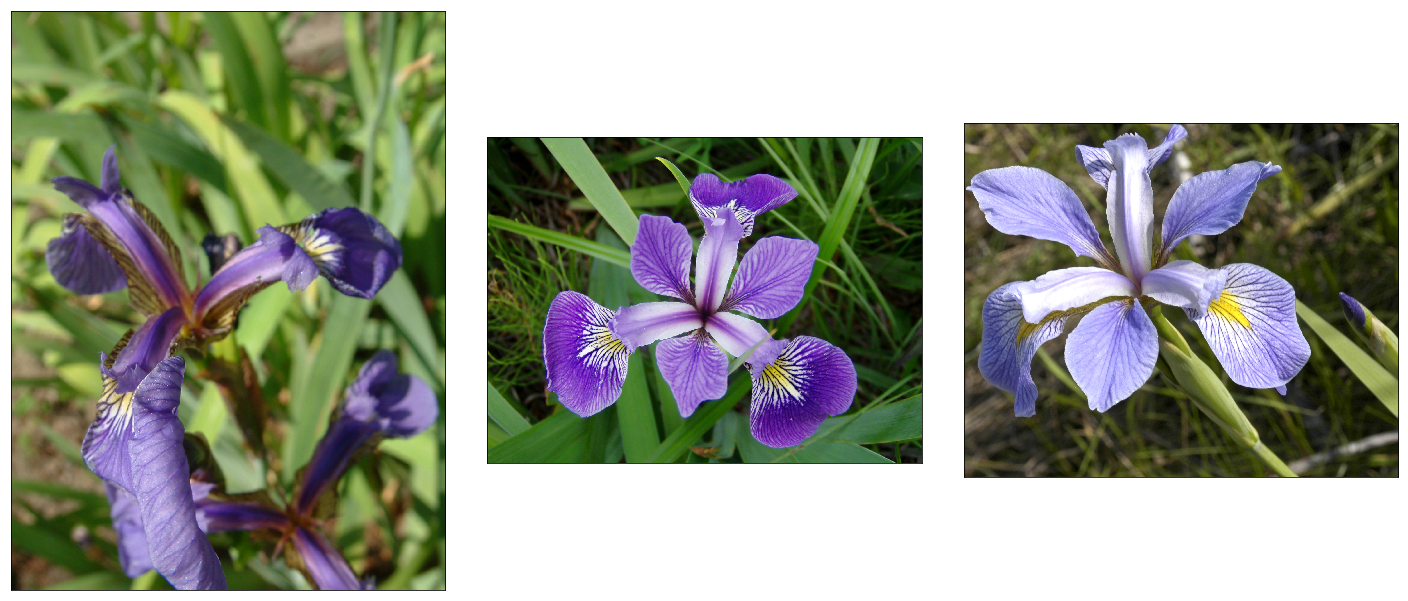

In [2]:
# Iris Setosa
i1 = 'http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg'

#Iris Versicolor
i2 = 'http://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg'

# Iris Virginica
i3 = 'http://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg'

flowers = []
names = ["Setosa", "Versicolor", "Virginica"]

for index, iris in enumerate([i1,i2,i3]):
    
    req = requests.get(iris)
    img = Image.open(BytesIO(req.content))
    flowers.append(img)
   
f, ax = plt.subplots(1,3, figsize = (20,20))
f.tight_layout()

for index,iris in enumerate(flowers):
    ax[index].imshow(iris)
    
for a in ax:
    a.set_xticks([])
    a.set_yticks([])

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

----
## Load Data

In [3]:
iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<br>
No missing data, so we're ready to dig in. We'll start with an EDA.
<br>

----

## Exploratory Data Analysis

** Create a pairplot of the data set. Which flower species seems to be the most separable? **

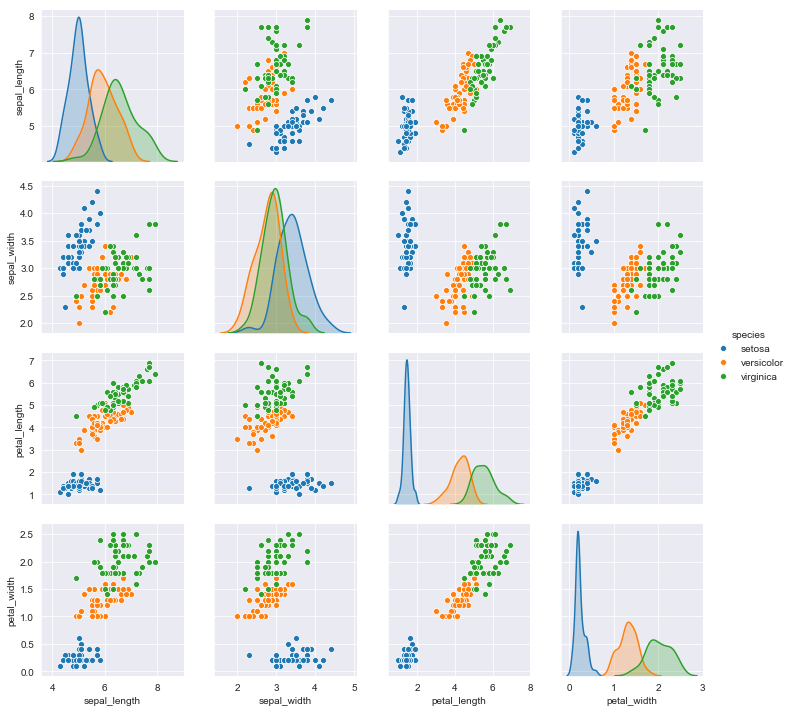

In [5]:
sns.set_style("darkgrid")
sns.pairplot(data = iris, hue = "species")

We observe that in each distribution the **setosa** species seems to be markedly different in each feature than the other two in the sample.
<br> <br>
** Create a kde plot of sepal_length versus sepal width for setosa species of flower. **

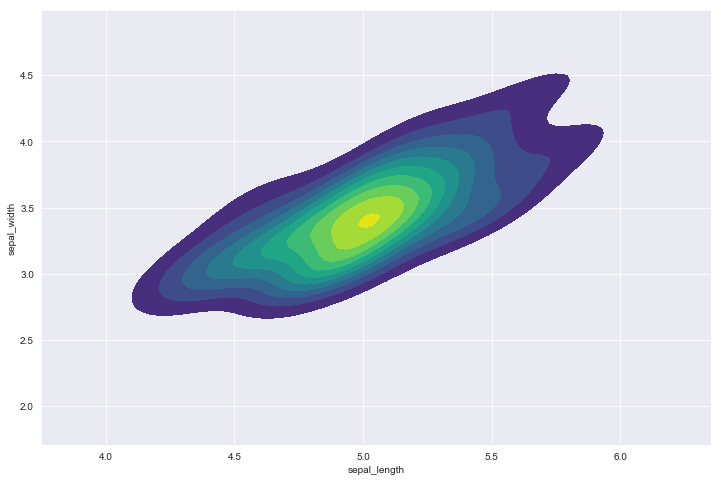

In [6]:
# Setosa data only
setosa = iris[iris["species"] == "setosa"]

# KDE plot
plt.figure(figsize = (12,8))
sns.kdeplot(setosa["sepal_length"], setosa["sepal_width"], 
            cmap = "viridis", shade = True, shade_lowest = False)

# Train Test Split

** Split your data into a training set and a testing set.**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# All features besides the target variable
X = iris.drop(["species"], axis = 1)

# Target variable only
y = iris["species"]

# Partition 30% of sample as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 823)

# Train a Model

Now its time to train a Support Vector Machine Classifier. 

** Call the SVC() model from sklearn and fit the model to the training data. **

In [9]:
from sklearn.svm import SVC

In [10]:
# Gamma changed to auto to suppress warning - default = "auto_deprecated"
model = SVC(gamma = "auto")

In [11]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Model Evaluation

** Now get predictions from the model and create a confusion matrix and a classification report. **

In [12]:
preds = model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(confusion_matrix(preds, y_test))

[[14  0  0]
 [ 0 14  1]
 [ 0  0 16]]


In [15]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        16

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



This model demonstrates robust predictive power regardless of which criteria you choose to judge it on - **precision, recall, or f1-score**. 
<br> <br> 
For the sake of practice, let's use a grid search to optimize the parameters and squeeze a little more power out of this model.

-----
## Gridsearch Practice

In [16]:
from sklearn.model_selection import GridSearchCV

** Create a dictionary called param_grid and fill out some parameters for C and gamma. **

In [17]:
# Dictionary to be used in GridSearch model selection
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]}

** Create a GridSearchCV object and fit it to the training data.**

In [18]:
# Instantiate GridSearchCV object with our chosen parameters
grid = GridSearchCV(SVC(), param_grid, verbose = 3, refit = True)

In [19]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.001, gamma=1 ................................................
[CV] ....... C=0.001, gamma=1, score=0.6857142857142857, total=   0.0s
[CV] C=0.001, gamma=1 ................................................
[CV] ....... C=0.001, gamma=1, score=0.6857142857142857, total=   0.0s
[CV] C=0.001, gamma=1 ................................................
[CV] ....... C=0.001, gamma=1, score=0.6857142857142857, total=   0.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ..... C=0.001, gamma=0.1, score=0.6857142857142857, total=   0.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ..... C=0.001, gamma=0.1, score=0.6857142857142857, total=   0.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ..... C=0.001, gamma=0.1, score=0.6857142857142857, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .... C=0.0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.01, score=0.6857142857142857, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1, gamma=0.001, score=0.6571428571428571, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1, gamma=0.001, score=0.6857142857142857, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1, gamma=0.001, score=0.6857142857142857, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .... C=0.1, gamma=0.0001, score=0.6571428571428571, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .... C=0.1, gamma=0.0001, score=0.6857142857142857, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .... C=0.1, gamma=0.0001, score=0.6857142857142857, total=   0.0s
[CV] C=0.1, gamma=1e-05 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    0.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [20]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

Our <b>C</b> value has increased and our <b>gamma</b> value has (presumably) decreased from the base model.
<br> <br>
Next, let's predict off of this optimized model and compare it to our base model.

In [21]:
# Predict off of optimized model
grid_preds = grid.predict(X_test)

In [22]:
print(confusion_matrix(grid_preds, y_test))

[[14  0  0]
 [ 0 13  0]
 [ 0  1 17]]


In [23]:
print(classification_report(grid_preds, y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.94      0.97        18

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



We observe a similarly powerful model after optimizing the <b>C</b> and <b>gamma</b> values from the base model.

## Great Job!